In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

sns.set_style('darkgrid')

In [2]:
## read the dataset 

df = pd.read_csv('income_evaluation.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
## check null values in dataset

df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [7]:
df.shape

(32561, 15)

In [8]:
df.columns = ['age', 'workclass', 'final_weight', 'education', 'education_num', 'martial_status', 'occupation', 'relationship', 'race', 'sex',
             'capital_gain', 'capital_loss', 'hrs_per_week', 'native_country', 'income']

In [9]:
df.columns

Index(['age', 'workclass', 'final_weight', 'education', 'education_num',
       'martial_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hrs_per_week', 'native_country',
       'income'],
      dtype='object')

In [10]:
df.income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [11]:
## converting income columns to 0's and 1's {0 for salary <=50K and 1 for salary >50K}
df['income'] = [1 if value == ' >50K' else 0 for value in df['income'].values]

In [12]:
## last 5 rows in dataset

df.tail()

,age,workclass,final_weight,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


In [13]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [14]:
df.dropna(axis=0, inplace=True)

In [15]:
workclass_label = {v:k for k, v in enumerate(df.workclass.unique())}

In [16]:
workclass_label

{' State-gov': 0,
 ' Self-emp-not-inc': 1,
 ' Private': 2,
 ' Federal-gov': 3,
 ' Local-gov': 4,
 ' ?': 5,
 ' Self-emp-inc': 6,
 ' Without-pay': 7,
 ' Never-worked': 8}

In [17]:
df.workclass = df.workclass.map(workclass_label)

In [18]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [19]:
education_label = {v:k for k, v in enumerate(df.education.unique())}

In [20]:
education_label

{' Bachelors': 0,
 ' HS-grad': 1,
 ' 11th': 2,
 ' Masters': 3,
 ' 9th': 4,
 ' Some-college': 5,
 ' Assoc-acdm': 6,
 ' Assoc-voc': 7,
 ' 7th-8th': 8,
 ' Doctorate': 9,
 ' Prof-school': 10,
 ' 5th-6th': 11,
 ' 10th': 12,
 ' 1st-4th': 13,
 ' Preschool': 14,
 ' 12th': 15}

In [21]:
df.education = df.education.map(education_label)

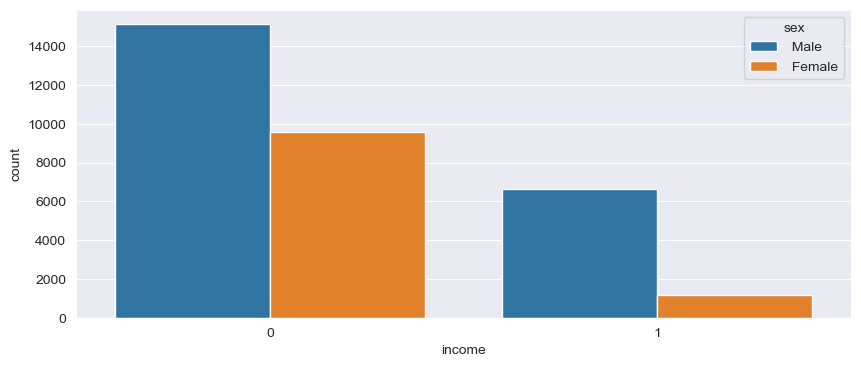

In [22]:
plt.figure(figsize=(10, 4))
sns.countplot(x='income', data=df, hue='sex');

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [27]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [33]:
# Separate features and target
X = df.drop(columns='income')
y = df['income']

# Define the column transformer with correct column names
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'final_weight', 'education_num', 'capital_gain', 'capital_loss', 'hrs_per_week']),
        ('cat', OneHotEncoder(), ['workclass', 'education', 'martial_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])
    ])

# Fit and transform the data
X_preprocessed = preprocessor.fit_transform(X)

# Now X_preprocessed is ready for machine learning models
print(X_preprocessed)

  (0, 0)	0.030670557354391753
  (0, 1)	-1.0636107451560883
  (0, 2)	1.1347387637961643
  (0, 3)	0.14845289521747937
  (0, 4)	-0.21665952703259014
  (0, 5)	-0.03542944697277691
  (0, 6)	1.0
  (0, 15)	1.0
  (0, 35)	1.0
  (0, 39)	1.0
  (0, 54)	1.0
  (0, 63)	1.0
  (0, 65)	1.0
  (0, 105)	1.0
  (1, 0)	0.8371089803598137
  (1, 1)	-1.0087070008321521
  (1, 2)	1.1347387637961643
  (1, 3)	-0.14592048355885345
  (1, 4)	-0.21665952703259014
  (1, 5)	-2.222153121346258
  (1, 7)	1.0
  (1, 15)	1.0
  (1, 33)	1.0
  (1, 42)	1.0
  (1, 53)	1.0
  :	:
  (32559, 3)	-0.14592048355885345
  (32559, 4)	-0.21665952703259014
  (32559, 5)	-1.6552247613235038
  (32559, 8)	1.0
  (32559, 16)	1.0
  (32559, 35)	1.0
  (32559, 39)	1.0
  (32559, 56)	1.0
  (32559, 63)	1.0
  (32559, 65)	1.0
  (32559, 105)	1.0
  (32560, 0)	0.9837341481789813
  (32560, 1)	0.9298925761456783
  (32560, 2)	-0.4200596240159423
  (32560, 3)	1.888424338306659
  (32560, 4)	-0.21665952703259014
  (32560, 5)	-0.03542944697277691
  (32560, 12)	1.0
  (32

In [45]:
print(df.columns)

Index(['age', 'final_weight', 'education_num', 'capital_gain', 'capital_loss',
       'hrs_per_week', 'income', 'workclass_0', 'workclass_1', 'workclass_2',
       ...
       'native_country_ Portugal', 'native_country_ Puerto-Rico',
       'native_country_ Scotland', 'native_country_ South',
       'native_country_ Taiwan', 'native_country_ Thailand',
       'native_country_ Trinadad&Tobago', 'native_country_ United-States',
       'native_country_ Vietnam', 'native_country_ Yugoslavia'],
      dtype='object', length=109)


In [46]:
# Split the data into features (X) and target variable (y)
X = df.drop('income', axis=1)
y = df['income']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the logistic regression model
lg = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence
lg.fit(X_train_scaled, y_train)

# Evaluate the model
train_accuracy = lg.score(X_train_scaled, y_train)
test_accuracy = lg.score(X_test_scaled, y_test)

print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)


Training accuracy: 0.8531063531063531
Test accuracy: 0.8547446002661481


In [48]:
# Split the data into features (X) and target variable (y)
X = df.drop('income', axis=1)
y = df['income']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the logistic regression model
lg = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence
lg.fit(X_train_scaled, y_train)

# Remove feature names before prediction
X_test_without_names = X_test.copy()
X_test_without_names.columns = range(X_test.shape[1])  # Removing feature names

# Make predictions
pred = lg.predict(X_test_without_names)

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

--------------------------------------------Classification Report---------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7455
           1       0.24      1.00      0.38      2314

    accuracy                           0.24      9769
   macro avg       0.12      0.50      0.19      9769
weighted avg       0.06      0.24      0.09      9769

------------------------------------------Accuracy Score---------------------------------------------------------
0.2368717371276487
--------------------------------------------Confustion Matrix-----------------------------------------------------


C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


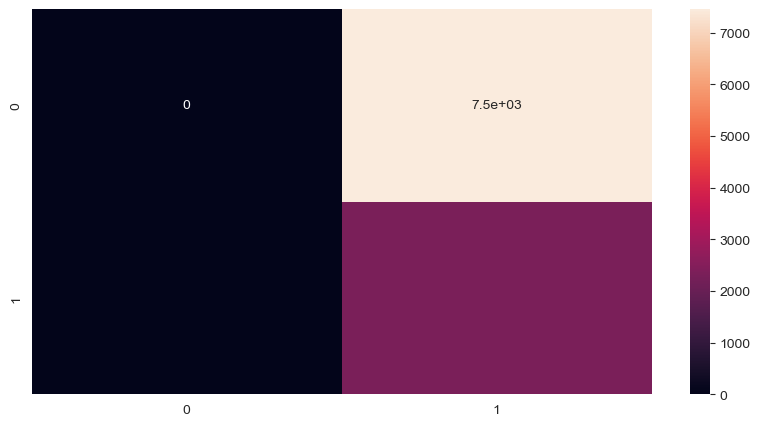

In [50]:
print("--------------------------------------------Classification Report---------------------------------------------")
print(classification_report(y_test, pred))

print("------------------------------------------Accuracy Score---------------------------------------------------------")
print(accuracy_score(y_test, pred))

print("--------------------------------------------Confustion Matrix-----------------------------------------------------")
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, pred), annot=True);